# Maps

## 1. Introduction

Maps are a way to present information on a (roughly) spherical earth on a flat plane, like a page or a screen. Here are two examples of common map projections. The projection is only accurate in the region where the plane touches the sphere, and is less accurate as the distance between the plane and the sphere increases.

#### Mercator
![Mercator](https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Usgs_map_mercator.svg/413px-Usgs_map_mercator.svg.png)

#### Lambert conformal conic
![Lambert conformal conic](https://upload.wikimedia.org/wikipedia/commons/d/da/USGS_map_Albers_conic_tall.gif)

You can read more about map projections from [_Map Projections – a Working Manual_](http://pubs.usgs.gov/pp/1395/report.pdf), the source of the images above, or, more entertainingly, from [XKCD](https://xkcd.com/977/).

We'll use `cartopy` to plot on maps. Check out the [gallery](http://scitools.org.uk/cartopy/docs/latest/gallery.html) for inspiration.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

####### if running this notebook on Google Colab; uncomment and run these lines
####### these lines came from https://colab.research.google.com/github/adamlamee/CODINGinK12/blob/master/notebooks/quakes.ipynb#scrollTo=9l3KQ4Bo-yrg
#!apt-get -qq install python-cartopy python3-cartopy;
#!pip uninstall -y shapely;    # cartopy and shapely aren't friends (early 2020)
#!pip install shapely --no-binary shapely;
#######

import cartopy
import cartopy.crs as ccrs  # commonly used shorthand
import cartopy.feature as cfeature


Here we have the most basic projection: plate carrée, which is an [equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection), and is essentially equivalent to just plotting the longitude and latitude values without a projection. I will refer to longitude and latitude as "geographic coordinates".

We can make an axes that is plotted in geographic coordinates (or, indeed, any projection we choose) by using the `projection` keyword argument to `fig.add_subplot()`. Here we also plot the coastline and add gridlines.

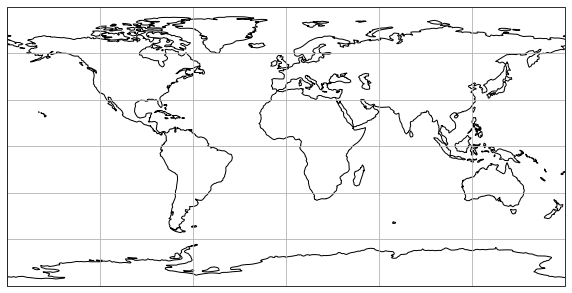

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')  # coastline resolution options are '110m', '50m', '10m'
ax.gridlines()

`cartopy` provides a number of projections. [Available projections](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) are:

    PlateCarree
    AlbersEqualArea
    AzimuthalEquidistant
    LambertConformal
    LambertCylindrical
    Mercator
    Miller
    Mollweide
    Orthographic
    Robinson
    Sinusoidal
    Stereographic
    TransverseMercator
    UTM
    InterruptedGoodeHomolosine
    RotatedPole
    OSGB
    EuroPP
    Geostationary
    Gnomonic
    LambertAzimuthalEqualArea
    NorthPolarStereo
    OSNI
    SouthPolarStereo  

Lambert Conformal Conic is a useful projection in numerical modeling because it preserves right angles. Here we use the projection without any keyword specifications, but with the coastline plotted so that we have something to look at.

The projection that we choose in the `axes` line with `projection=` is the projection that the plot is in. Data from any projection can be plotted on this map, but we will have to tell it which projection it is in.

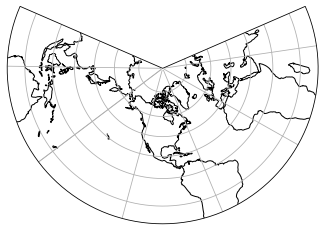

In [4]:
plt.figure()
ax = plt.axes(projection=ccrs.LambertConformal())  ## The map is in the Lambert Conformal projection
ax.coastlines(resolution='110m')
ax.gridlines()

Let's make a map of the Gulf of Mexico using the `LambertConformal` projection. Projections take in different keywords to specify properties. For this projection, we can specify the central longitude and latitude, which control the center of the projection. Our selection in the example is not far off from the default, so it looks similar to the previous plot.

C:\Users\dhenrichs\AppData\Local\Continuum\anaconda3\envs\ocng_669\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\dhenrichs\AppData\Local\Continuum\anaconda3\envs\ocng_669\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\dhenrichs\AppData\Local\Continuum\anaconda3\envs\ocng_669\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\dhenrichs\AppData\Local\Continuum\anaconda3\envs\ocng_669\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/na

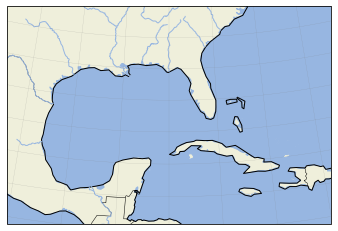

In [5]:
# the central_longitude and central_latitude parameters tell the projection where to be centered for the calculation
# The map is in Lambert Conformal
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-85.0, central_latitude=25.0))
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-')

# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
# We are choosing the bounds of the map using geographic coordinates, 
# then identifying as being in PlateCarree
ax.set_extent([-100, -70, 15, 35], ccrs.PlateCarree())

# add geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)

The map is plotted in a projected coordinate system, with units in meters, but the package deals with the projection behind the scenes. We can see this by looking at the limits of the two axes, which don't look like longitude/latitude at all:

In [6]:
ax.get_xlim(), ax.get_ylim()

((-1733395.7927432093, 1733395.7927432107),
 (-1096667.1852025278, 1229612.3028539214))

This same call to a plot set up with the `PlateCarree` projection, which is in geographic coordinates (lon/lat) does give limits in longitude and latitude, because in that case we told the plot to be in those coordinates, but in this case we said to use a `LambertConformal`.

We can use whatever type of coordinates we want, including latitude and longitude, as long as we tell `cartopy` which type we are using. 

As you saw above, we set the limits of the plot not with xlim and ylim, but with `extent` and the appropriate projection object.

---
### _Exercise_

> Create a map of the Gulf of Mexico using a different projection. How does it compare to the map above?

---

This is pretty good, but there are some limitations in this package currently. One is that we can't add labels to the lat/lon lines for the Lambert Conformal Conic projection. We can do this using Mercator, though:

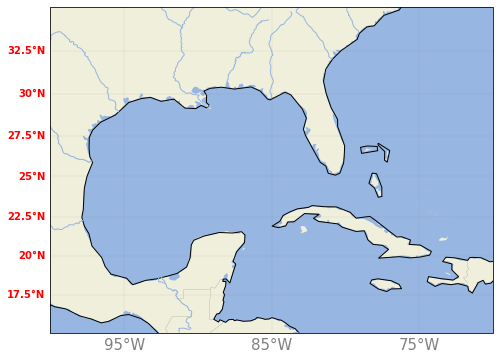

In [8]:
plt.figure(figsize=(10, 6))

# the central_longitude parameter tells the projection where to be centered for this axes
ax = plt.axes(projection=ccrs.Mercator(central_longitude=-85.0))
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)

# we control what we actually see in the plot with this:
# We can set the extent using latitude and longitude, but then we need to tell it the projection, which is
# PlateCarree since that is equivalent
ax.set_extent([-100, -70, 15, 35], ccrs.PlateCarree())

# add geographic information
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='110m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.1)
ax.add_feature(cartopy.feature.RIVERS)

# Now we can add on lat/lon labels:
# more info: http://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-105, -95, -85, -75, -65])  # control where the ticks are
gl.xlabel_style = {'size': 15, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'color': 'red', 'weight': 'bold'}
gl.top_labels = False  # turn off labels where you don't want them
gl.right_labels = False

When we want to add something to the plot, we just need to tell it what projection the information is given in using the `transform` keyword argument.

If the information is in latitude/longitude – typical for the way people tend to think about information (instead of projected locations) – then we give the Plate Carree projection with the `transform` keyword argument to the plot call:
> `transform=ccrs.PlateCarree()`

For example, to plot some points with a particular projection, you can type:
> `plt.plot(xpts, ypts, transform=ccrs.projection_that_xpts_and_ypts_are_given_in`)

A nice thing about the `cartopy` package is that you can plot directly data from any projection — you just tell it the projection through the `transform` keyword argument when you add to the plot.

---
### _Exercise_

> The latitude and longitude of College Station are given below. Plot the location of College Station on the map above with a red dot.

    lat_cll = 30.0 + 36.0/60.0 + 5.0/3600.0
    lon_cll = -(96.0 + 18.0/60.0 + 52.0/3600.0)
    
_What happens if you put in the wrong projection or no projection?_

---

---
### _Exercise_

> Data from any projection can be added to a map, the data must just be input with its projection using the `transform` keyword.

> The x, y location of Austin, TX, is given below in the Mercator projection. Plot the location of Austin in Mercator coordinates on the map above with a blue 'x'.

    x, y = -10880707.173023093, 3516376.324225941

---

## Point conversion

While `cartopy` removes the need to convert points on your own between projections (instead doing it behind the scenes), you can always convert between projections if you want using the following. Or, if you want to transform more than one point, use `projection.transform_points(projection, x, y)`.

In [9]:
projection = ccrs.Mercator()

x, y = projection.transform_point(-93.0-45.0/60.0, 27.0+55.0/60.0, ccrs.PlateCarree())
print(x, y)

-10436202.261869397 3218471.1431564046


---
### _Exercise_

> Convert the Mercator coordinates given for Austin to latitude and longitude and confirm that they are correct.

---

## Other features you can add

The code we used earlier, like:

    ax.add_feature(cartopy.feature.LAND)

was a convenience function wrapping more complex and capable code options. Here we explore a little more the capabilities. <br>
<b>Note:</b> this requires downloading data which you will see a warning about the first time you run the code.

We can set up the ability to plot with high resolution land data:

In [10]:
# this is another way to do `ax.add_feature(cartopy.feature.LAND)` but to have more control over it
# 50m: moderate resolution data
# set up for plotting land
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=cfeature.COLORS['land'])
# set up for plotting water at higher resolution
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                         edgecolor='face', facecolor=cfeature.COLORS['water'])

There are also some built-in colors, but you can use any matplotlib color available to color the land or water.

In [11]:
sorted(cfeature.COLORS.keys())

['land', 'land_alt1', 'water']

Using higher resolution can be pretty significantly different.

Here we will prepare the higher resolution land and ocean information for the highest resolution available, then use it in the plot.

In [12]:
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
ocean_10m = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

C:\Users\dhenrichs\AppData\Local\Continuum\anaconda3\envs\ocng_669\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\dhenrichs\AppData\Local\Continuum\anaconda3\envs\ocng_669\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


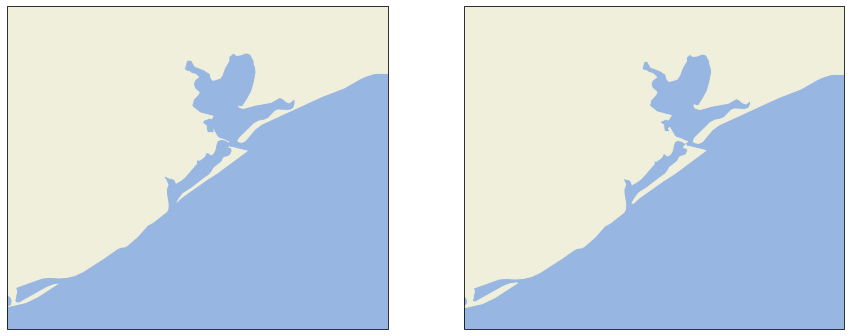

In [13]:
projection=ccrs.LambertConformal(central_longitude=-95.0, central_latitude=29.0)

# Galveston Bay
fig = plt.figure(figsize=(15, 15))

# lower resolution
ax1 = fig.add_subplot(1,2,1, projection=projection)
ax1.set_extent([-96, -94, 28.5, 30], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)


# now higher resolution
ax2 = fig.add_subplot(1,2,2, projection=projection)
ax2.set_extent([-96, -94, 28.5, 30], ccrs.PlateCarree())
ax2.add_feature(ocean_10m)
ax2.add_feature(land_10m)


Here is a list (with reference names in some cases appended) of the [many features](http://www.naturalearthdata.com/features/) that are available through Natural Earth:

*(10, 50, 110 for high, medium, low resolution)*

**Physical Vector Data Themes:**

(`physical`)

* Coastline (10, 50, 110): `coastline`
* Land (10, 50, 110): `land`
* Ocean (10, 50, 110): `ocean`
* Minor Islands (10): `minor_islands`, `minor_islands_coastline`
* Reefs (10): `reefs`
* Physical region features (10): `geography_regions_polys`, `geography_regions_points`, `geography_regions_elevation_points`, `geography_marine_polys`
* Rivers and Lake Centerlines (10, 50, 110): `rivers_lake_centerlines`
* Lakes (10, 50, 110): `lakes`
* Glaciated areas (10, 50, 110): `glaciated_areas`
* Antarctic ice shelves (10, 50): `antarctic_ice_shelves_polys`, `antarctic_ice_shelves_lines`
* Bathymetry (10): `bathymetry_all` or choose which depth(s)
* Geographic lines (10, 50): `geographic_lines`
* Graticules (10, 50, 110): (grid lines) `graticules_all` or choose degree interval


**Raster Data Themes:**

(`raster`: land coloring)

* Cross Blended Hypsometric Tints (10, 50)
* Natural Earth 1 (10, 50)
* Natural Earth 2 (10, 50)
* Ocean Bottom (10, 50)
* Bathymetry (50)
* Shaded Relief (10, 50)
* Gray Earth (10, 50)
* Manual Shaded Relief (10, 50)


**Cultural Vector Data Themes:**

(`cultural`)

* Countries (10, 50, 110): `admin_0_countries`, `admin_0_countries_lakes`, `admin_0_boundary_lines`
* Disputed areas and breakaway regions (10, 50)
* First order admin (provinces, departments, states, etc.) (10, 50): e.g. `admin_1_states_provinces_lines`
* Populated places (10, 50, 110)
* Urban polygons (10, 50)
* Parks and protected areas (10): `parks_and_protected_lands`
* Pacific nation groupings (10, 50, 110)
* Water boundary indicators (10)

Here is an example showing state boundaries:

C:\Users\dhenrichs\AppData\Local\Continuum\anaconda3\envs\ocng_669\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


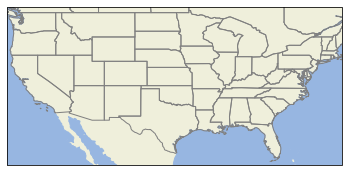

In [14]:
projection=ccrs.PlateCarree()
fig = plt.figure()
ax = fig.add_subplot(111, projection=projection)
ax.set_extent([-125, -70, 24, 50], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, edgecolor='gray')
